In [ ]:
%config InlineBackend.figure_format = 'retina'

# Testing Enviornment

In [ ]:
import pandas as pd
from pandas import DataFrame
import numpy as np

## Running tests

The following section unit-tests most of the code written for the proof of concept prototype.

In [ ]:
%run ../test/test_algorithms.py

In [ ]:
%run ../test/test_dataloader.py

In [ ]:
%run ../test/test_predictorsI.py

In [ ]:
%run ../test/test_predictorsII.py

In [ ]:
%run ../test/test_activate.py

## Running example of the system

In [ ]:
%run ../consensus/algorithms.py

In [ ]:
%run ../tools/dataloader.py

In [ ]:
test = DataLoader('aapl', '2009-01-01', '2010-02-10')

In [ ]:
prices = test.get_close()

In [ ]:
prices

In [ ]:
#prices = np.array(prices)
#len(prices)

In [ ]:
prices

In [ ]:
%run ../tools/predictorsI.py

In [ ]:
op0 = BasicUnivariatePredictor(prices, 25, 7)
op1 = BasicUnivariatePredictor(prices, 25, 7)
op2 = BasicUnivariatePredictor(prices, 25, 7)
op3 = BasicUnivariatePredictor(prices, 25, 7)

In [ ]:
op0.create_bilstm()

In [ ]:
op0.model_blueprint()

In [ ]:
op0.fit_model(10)

In [ ]:
op0.show_performance()

In [ ]:
oyea = prices[-26:-1]
#oyea = X[-1]
#oyea

In [ ]:
nice = op0.predict(oyea)
nice

In [ ]:
op1.create_lstm()

In [ ]:
op1.model_blueprint()

In [ ]:
op1.fit_model(10)

In [ ]:
op1.show_performance()

In [ ]:
nice = op1.predict(oyea)
nice

In [ ]:
op2.create_cnn()

In [ ]:
op2.model_blueprint()

In [ ]:
op2.fit_model(10)

In [ ]:
op2.show_performance()

In [ ]:
nice = op2.predict(oyea)
nice

In [ ]:
op3.create_mlp()

In [ ]:
op3.model_blueprint()

In [ ]:
op3.fit_model(100)

In [ ]:
op3.show_performance()

In [ ]:
oyea = prices[-26:-1]
#oyea = X[-1]
#oyea

In [ ]:
nice = op3.predict(oyea)
nice

In [ ]:
%run ../tools/predictorsII.py

In [ ]:
oo = UnivariatePredictorII(prices, 7)

In [ ]:
oo.fit_neural_model(100,"D")

In [ ]:
oo.show_performance_neural()

In [ ]:
oo.predict_neural()

In [ ]:
oo.fit_prophet_model()

In [ ]:
oo.show_performance_prophet()

In [ ]:
oo.predict_prophet()

In [ ]:
%run ../tools/predictorsIII.py

In [ ]:
len(prices)

In [ ]:
op4 = HybridUnivariatePredictor(prices,2, 24, 7)

In [ ]:
op4.create_cnnlstm()

In [ ]:
op4.model_blueprint()

In [ ]:
op4.fit_model(10)

In [ ]:
op4.show_performance()

In [ ]:
oyea = prices[-25:-1]
#oyea = X[-1]
#oyea

In [ ]:
nice = op4.predict(oyea)
nice
#noice = pd.DataFrame(nice, columns=['yea'])
#noice = nice.reshape(20, 1)
#noice = pd.DataFrame(noice, columns=['yea'])

In [ ]:
nice.plot()

## Whole system test - I am alive v.2

In [1]:
%run ../tools/dataloader.py
%run ../system/activate.py

In [2]:
training = DataLoader('aapl', '2009-01-01', '2010-05-01')

In [3]:
training = training.get_close()

In [4]:
real = DataLoader('aapl', '2010-05-01', '2010-05-28')

In [5]:
real = real.get_close()

In [6]:
len(real)

20

In [ ]:
predict = DataLoader('aapl', '2010-06-01', '2010-09-01')

In [ ]:
predict = predict.get_close()

In [ ]:
predict_req, real = data_prep(predict, 24, 30)

In [ ]:
real

In [ ]:
final_df1 = individual_predictors1(training, predict_req, 30)

In [ ]:
final_df2 = individual_predictors2(training, predict_req, 30)

In [ ]:
final_df3 = individual_predictors3(training, predict_req, 30)

In [ ]:
final_df4 = individual_predictors4(training, predict_req, 30)

INFO: nprophet.utils - set_auto_seasonalities: Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO: nprophet.utils - set_auto_seasonalities: Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 2.85E+00
Epoch[50/50]: 100%|█| 50/50 [00:02<00:00, 20.41it/s, SmoothL1Loss=0.000656, MAE=0.167, RegLoss=0, MAE_val=0.482, Smooth


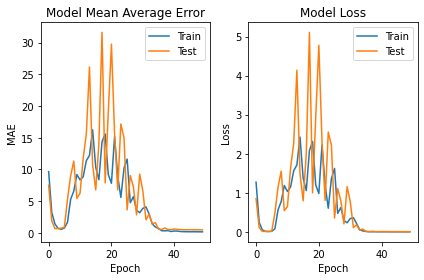

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 20 forecasts with cutoffs between 2009-10-02 00:00:00 and 2010-04-10 00:00:00


  0%|          | 0/20 [00:00<?, ?it/s]

In [ ]:
final_df5 = individual_predictors5(training, 20)

### System Disagreement

In [ ]:
system_disagreement(final_df1)

In [ ]:
system_disagreement(final_df2)

In [ ]:
system_disagreement(final_df3)

In [ ]:
system_disagreement(final_df4)

In [ ]:
system_disagreement(final_df5)

### System consensus

In [ ]:
algos1 = consensus(final_df1, real)

In [ ]:
algos2 = consensus(final_df2, real)

In [ ]:
algos3 = consensus(final_df3, real)

In [ ]:
algos4 = consensus(final_df4, real)

In [ ]:
algos5 = consensus(final_df5, real)

In [ ]:
ui1 = combined_frame(final_df1, algos1, real)

In [ ]:
ui2 = combined_frame(final_df2, algos2, real)

In [ ]:
ui3 = combined_frame(final_df3, algos3, real)

In [ ]:
ui4 = combined_frame(final_df4, algos4, real)

In [ ]:
ui5 = combined_frame(final_df5, algos5, real)

In [ ]:
dis = disagreement(final_df5)
score = predictor_score(final_df5)
dis = set_same_index(dis, ui5)
score = set_same_index(score, ui5)

In [ ]:
ui5_comb = pd.concat([ui5, dis, score], axis=1)

In [ ]:
yu = all_stats_frame(ui5, final_df5)

In [ ]:
yu

In [ ]:
mse_score(ui5)

In [ ]:
mse_log_score(ui4)

In [ ]:
mae_score(ui1)

In [ ]:
mse_score(ui2)

In [ ]:
mse_log_score(ui1)

In [ ]:
mae_score(ui2)

In [ ]:
mse_score(ui3)

In [ ]:
mse_log_score(ui3)

In [ ]:
mae_score(ui3)

In [ ]:
plot_performance(ui1)

In [ ]:
plot_performance(ui2)

In [ ]:
plot_performance(ui3)

In [ ]:
plot_performance(ui4)

In [ ]:
plot_performance(ui5)

In [ ]:
ui5

In [ ]:
training = DataLoader('aapl', '2000-01-01', '2010-05-01')

In [ ]:
training = training.get_close()

In [ ]:
motest = HybridUnivariatePredictor(training,2, 24, 30)

In [ ]:
motest.create_cnnlstm()

In [ ]:
motest.fit_model(300)

In [ ]:
motest.show_performance()

In [ ]:
motest.save_model()

In [ ]:
moload = HybridUnivariatePredictor(training,2, 24, 30)

In [ ]:
moload.load_model('../pretrained/model')

In [ ]:
moload.model_blueprint()

In [ ]:
moload.predict(training[-25:-1])